In [1]:
%pylab inline
from wallet.util.analysis import Analysis

Populating the interactive namespace from numpy and matplotlib


In [ ]:
##############################

,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
AAPL,21.0,0.553007,0.379839,-0.095748,-0.040351,0.596615,1.043717,1.118097,1.435005,14.709736,3.519492,-0.204370
QQQ,21.0,0.404926,0.529155,-0.349220,-0.318228,0.501964,1.100270,1.473236,0.750232,11.046550,3.464071,0.171348
MSFT,21.0,0.385383,0.687273,-1.036453,-0.989111,0.590041,1.201174,1.423843,0.549194,8.917163,5.337814,-0.693124
SPY,21.0,0.209197,0.409694,-0.556800,-0.401523,0.318800,0.726982,1.107045,0.491247,7.493349,3.845538,-0.106077


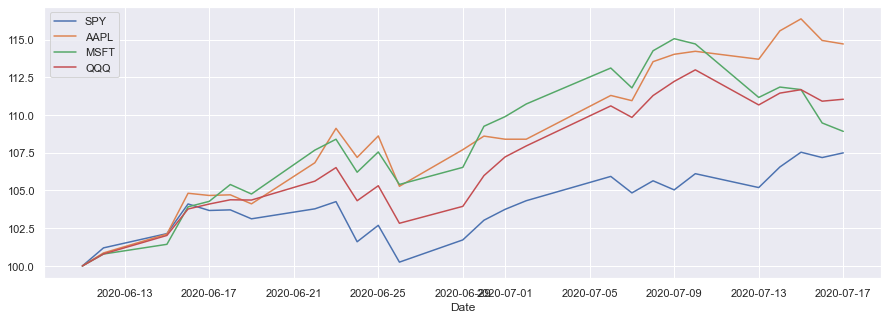

In [2]:
from pandas import DataFrame
from wallet.util.analysis import _optimize, _moving_average_statistics
portfolio = {'AAPL': .2, 'MSFT': .2, 'QQQ': .6}
ana = Analysis(['SPY',*portfolio], 21, 5)
ana.graph()

In [3]:
ana.setup_mask(['SPY', *portfolio])
start = ana.data.index[0]
data = {col: ana.data[col] * (100 / ana.data[col][start]) for col in ana.data.columns}
data['AMQ'] = sum(data[st] * sh for st, sh in portfolio.items())
for col in portfolio.keys():
    del data[col]
frame = DataFrame(data)
print(_optimize(frame.rolling(5).mean().pct_change() * 100, .008, False, True))
_moving_average_statistics(frame, 5, .008)

({'SPY': 1.0, 'AMQ': -0.5397}, 3.2465)


<ipython-input-3-3c9d1541b20a>:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  data['AMQ'] = sum(data[st] * sh for st, sh in portfolio.items())


,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
AMQ,21.0,0.430914,0.500157,-0.397254,-0.305312,0.409753,0.969890,1.391419,0.845562,11.353310,3.333957,-0.000274
SPY,21.0,0.209197,0.409694,-0.556800,-0.401523,0.318800,0.726982,1.107045,0.491092,7.493349,3.845538,-0.106077


,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
Portfolio,21.0,0.315857,0.395987,-0.564398,-0.551410,0.439357,0.763019,0.818537,0.777602,6.857301,2.970793,-0.918260
SPY,21.0,0.209197,0.409694,-0.556800,-0.401523,0.318800,0.726982,1.107045,0.491247,7.493349,3.845538,-0.106077


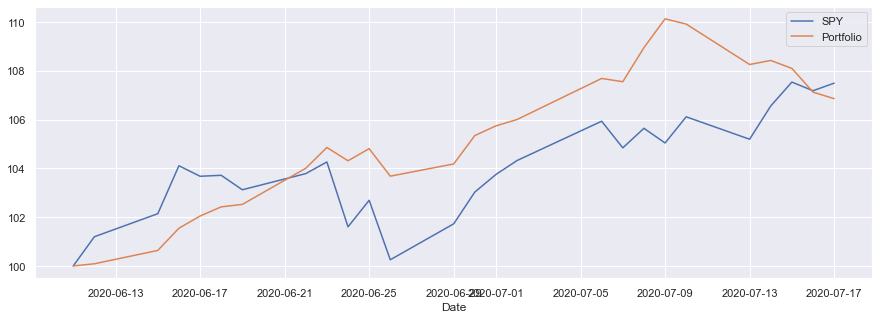

In [7]:
ana.graph({'SPY': -.60, **portfolio}, drop_components=list(portfolio))

,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
Portfolio,21.0,0.306035,0.392596,-0.578873,-0.572665,0.444041,0.709803,0.808352,0.759301,6.482633,3.089207,-1.002351
SPY,21.0,0.209197,0.409694,-0.556800,-0.401523,0.318800,0.726982,1.107045,0.491247,7.493349,3.845538,-0.106077


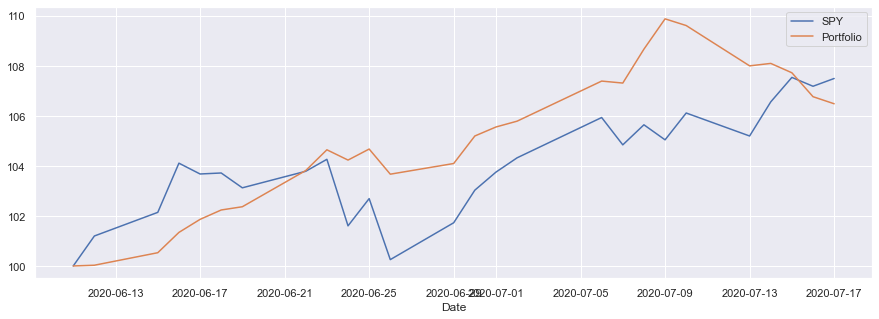

In [8]:
ana.graph({'SPY': -.65, **portfolio}, drop_components=list(portfolio))

,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
Portfolio,21.0,0.296176,0.390226,-0.594039,-0.593436,0.407611,0.694151,0.798120,0.738647,6.107966,3.208166,-1.078548
SPY,21.0,0.209197,0.409694,-0.556800,-0.401523,0.318800,0.726982,1.107045,0.491247,7.493349,3.845538,-0.106077


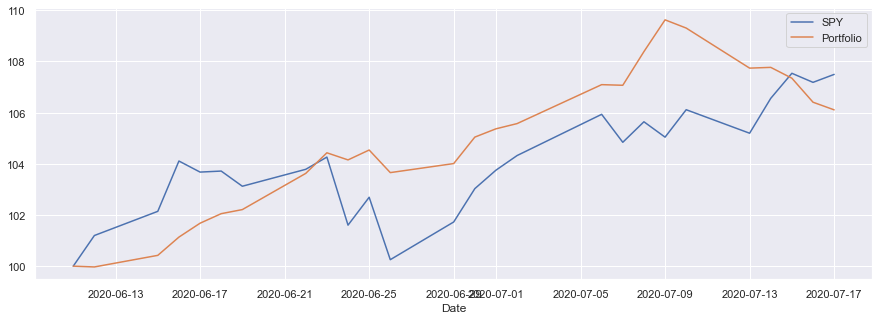

In [9]:
ana.graph({'SPY': -.70, **portfolio}, drop_components=list(portfolio))

,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
Portfolio,21.0,0.286279,0.388905,-0.615534,-0.608086,0.3711,0.679127,0.787840,0.715709,5.733298,3.327673,-1.144458
SPY,21.0,0.209197,0.409694,-0.556800,-0.401523,0.3188,0.726982,1.107045,0.491247,7.493349,3.845538,-0.106077


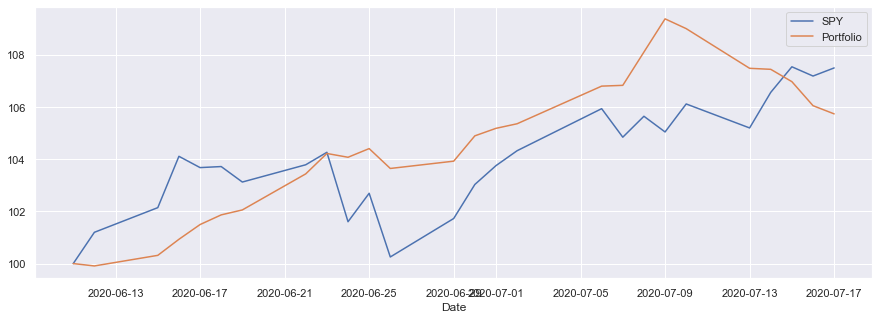

In [10]:
ana.graph({'SPY': -.75, **portfolio}, drop_components=list(portfolio))

,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
Portfolio,21.0,0.276345,0.388654,-0.637151,-0.622826,0.334747,0.664030,0.777513,0.690611,5.358631,3.447732,-1.198001
SPY,21.0,0.209197,0.409694,-0.556800,-0.401523,0.318800,0.726982,1.107045,0.491247,7.493349,3.845538,-0.106077


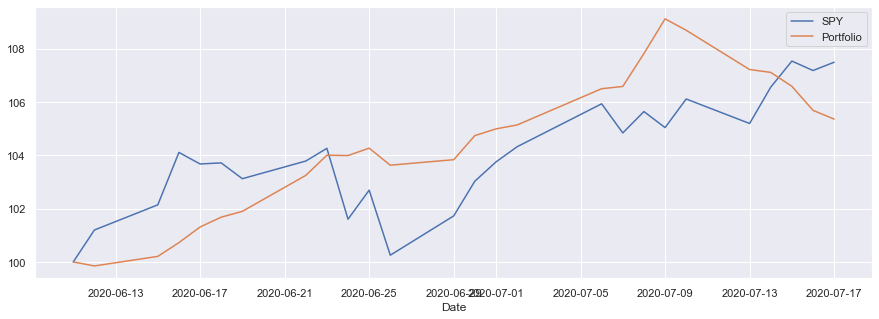

In [11]:
ana.graph({'SPY': -.80, **portfolio}, drop_components=list(portfolio))

In [ ]:
##############################

In [ ]:
ana = Analysis(['SPY','QQQ'], 21, 5)
ana.graph()

In [ ]:
ana.drop_mask()
ana.optimize_iteration([100], max_count=2, sharpe=False, allow_short=True)

In [ ]:
ana.graph({'SPY': -0.6, 'QQQ': 1.0})

In [ ]:
ana.graph({'SPY': -0.7, 'QQQ': 1.0})

In [ ]:
ana.graph({'SPY': -0.8, 'QQQ': 1.0})